<a href="https://colab.research.google.com/github/JMartinArocha/MasterBigData/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: 
 [5.65454545]
Mean squared error: 553.99
Coefficient of determination: -0.14


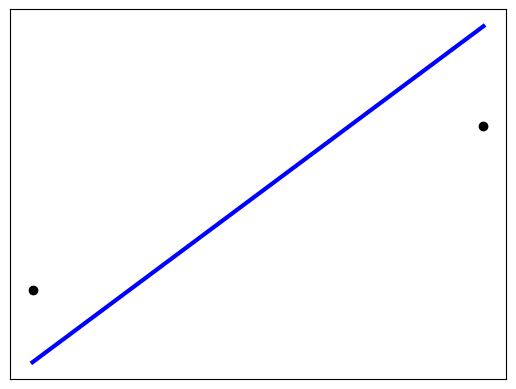

In [114]:
#1 Modifica el código usando los datos del archivo adjunto y muestra los puntos junto con la recta de regresión usando el modelo de scikit-learn.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Creamos un dataframe con los datos proporcionados.
datos = {
    'Restaurante': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Poblacion': [2, 6, 8, 8, 12, 16, 20, 20, 22, 26],
    'Ventas': [58, 105, 88, 118, 117, 137, 157, 169, 149, 202]
}
datos_df = pd.DataFrame(datos)

# Convertir las columnas 'Poblacion' y 'Ventas' a tipo numérico si es necesario
datos_df['Poblacion'] = pd.to_numeric(datos_df['Poblacion'])
datos_df['Ventas'] = pd.to_numeric(datos_df['Ventas'])

X = datos_df[['Poblacion']]  # Variables independientes (X)
y = datos_df['Ventas']  # Variable dependiente (y)

# Separamos los valores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

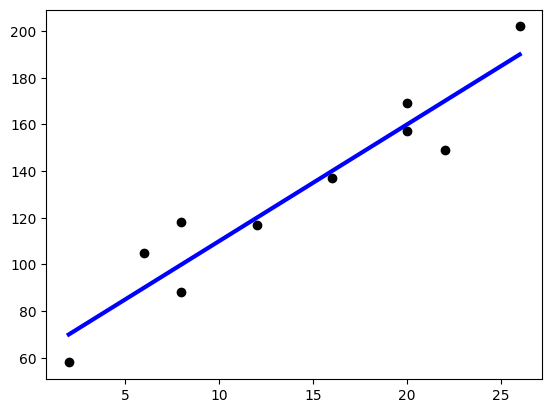

In [115]:
#2 Calcula la recta de regresión usando las fórmulas y dibújala con matplotlib:
# Cálculos estadísticos
X_array = X['Poblacion'].values
y_array = y.values

# Cálculos estadísticos
n = len(X_array)
x_mean = np.mean(X_array)
y_mean = np.mean(y_array)
sum_xy = np.sum(X_array * y_array)
sum_x2 = np.sum(X_array**2)

# Cálculo de la pendiente (b1) y del intercepto (b0)
b1 = (n * sum_xy - np.sum(X_array) * np.sum(y_array)) / (n * sum_x2 - (np.sum(X_array))**2)
b0 = y_mean - b1 * x_mean

# Generación de la línea de regresión
x_values = np.array([min(X_array), max(X_array)])
y_values = b1 * x_values + b0

# Visualización con matplotlib
plt.scatter(X, y, color='black')  # Puntos de datos
plt.plot(x_values, y_values, color='blue', linewidth=3)  # Línea de regresión


In [116]:
#3 Calcula los coeficientes de determinación r2 y r

coeficientes = regr.coef_
r2 = r2_score(y_test, y_pred)
pearson = np.corrcoef(datos_df['Poblacion'], datos_df['Ventas'])[0, 1]
mean_squared = mean_squared_error(y_test, y_pred)
if r2 >= 0:
    r = np.sqrt(r2)
else:
    r = None

# Coeficientes
print("Coeficientes de la regresión:", coeficientes)
print("Coeficiente de determinación R^2:", r2)
if r is not None:
    print("Coeficiente de correlación r:", r)
else:
    print("Valor de R^2 no válido para calcular la raíz cuadrada")
print("Coeficiente de correlación Pearson:", pearson)
print("Error cuadrático medio (MSE): %.2f" % mean_squared)


Coeficientes de la regresión: [5.65454545]
Coeficiente de determinación R^2: -0.1446097004986009
Valor de R^2 no válido para calcular la raíz cuadrada
Coeficiente de correlación Pearson: 0.9501229552044079
Error cuadrático medio (MSE): 553.99
